In [1]:
import sys
sys.path.append("./codes")
from codes.tokenizer import SPE_Tokenizer
from torch.utils.tensorboard import SummaryWriter

Celecoxib = ["Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2)cc1", \
            "c1(-c2ccc(C)cc2)n(-c2ccc(S(N)(=O)=O)cc2)nc(C(F)(F)F)c1", \
            "c1c(S(N)(=O)=O)ccc(-n2nc(C(F)(F)F)cc2-c2ccc(C)cc2)c1", \
            "c1(-n2nc(C(F)(F)F)cc2-c2ccc(C)cc2)ccc(S(=O)(=O)N)cc1", \
            "c1(C(F)(F)F)cc(-c2ccc(C)cc2)n(-c2ccc(S(=O)(N)=O)cc2)n1"]
Troglitazone = ["Cc1c(C)c2c(c(C)c1O)CCC(C)(COc1ccc(CC3SC(=O)NC3=O)cc1)O2", \
                "CC1(COc2ccc(CC3C(=O)NC(=O)S3)cc2)Oc2c(C)c(C)c(O)c(C)c2CC1", \
                "c12c(c(C)c(O)c(C)c1C)CCC(C)(COc1ccc(CC3C(=O)NC(=O)S3)cc1)O2", \
                "C1(COc2ccc(CC3C(=O)NC(=O)S3)cc2)(C)CCc2c(C)c(O)c(C)c(C)c2O1", \
                "c1(C)c2c(c(C)c(C)c1O)OC(C)(COc1ccc(CC3SC(=O)NC3=O)cc1)CC2"]
Thiothixene = ["CN1CCN(CC/C=C2/c3ccccc3Sc3ccc(S(=O)(=O)N(C)C)cc32)CC1", \
                "c1cc2c(cc1)Sc1c(cc(S(=O)(=O)N(C)C)cc1)/C2=C\CCN1CCN(C)CC1", \
                "c1cc2c(cc1)/C(=C/CCN1CCN(C)CC1)c1cc(S(=O)(N(C)C)=O)ccc1S2", \
                "C(N1CCN(C)CC1)C/C=C1/c2ccccc2Sc2c1cc(S(N(C)C)(=O)=O)cc2", \
                "c1c(S(=O)(=O)N(C)C)ccc2c1/C(=C\CCN1CCN(C)CC1)c1ccccc1S2"]

In [2]:
writer = SummaryWriter(f"log_fragments/T01")

for i in range(1000):
    codes = open(f"guacamol_0/tokens_step{i}.txt", 'r')
    SPE_tokenizer = SPE_Tokenizer(codes)
    codes.close()
    tokens = SPE_tokenizer.tokenize(Troglitazone[0])
    writer.add_scalar('Number of tokens', len(tokens) - 2, i)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
tokens01 = pd.read_csv("temp_data/tokens0_1.csv")
tokens02 = pd.read_csv("temp_data/tokens0_2.csv")
tokens03 = pd.read_csv("temp_data/tokens0_3.csv")
tokens04 = pd.read_csv("temp_data/tokens0_4.csv")
tokens05 = pd.read_csv("temp_data/tokens0_5.csv")
tokens11 = pd.read_csv("temp_data/tokens1_1.csv")
tokens12 = pd.read_csv("temp_data/tokens1_2.csv")
tokens13 = pd.read_csv("temp_data/tokens1_3.csv")
tokens14 = pd.read_csv("temp_data/tokens1_4.csv")
tokens15 = pd.read_csv("temp_data/tokens1_5.csv")
tokens21 = pd.read_csv("temp_data/tokens2_1.csv")
tokens22 = pd.read_csv("temp_data/tokens2_2.csv")
tokens23 = pd.read_csv("temp_data/tokens2_3.csv")
tokens24 = pd.read_csv("temp_data/tokens2_4.csv")
tokens25 = pd.read_csv("temp_data/tokens2_5.csv")
tokens0_1 = pd.read_csv("temp_data/T01.csv")
tokens0_2 = pd.read_csv("temp_data/T02.csv")
tokens1_0 = pd.read_csv("temp_data/T10.csv")
tokens1_2 = pd.read_csv("temp_data/T12.csv")
tokens2_0 = pd.read_csv("temp_data/T20.csv")
tokens2_1 = pd.read_csv("temp_data/T21.csv")

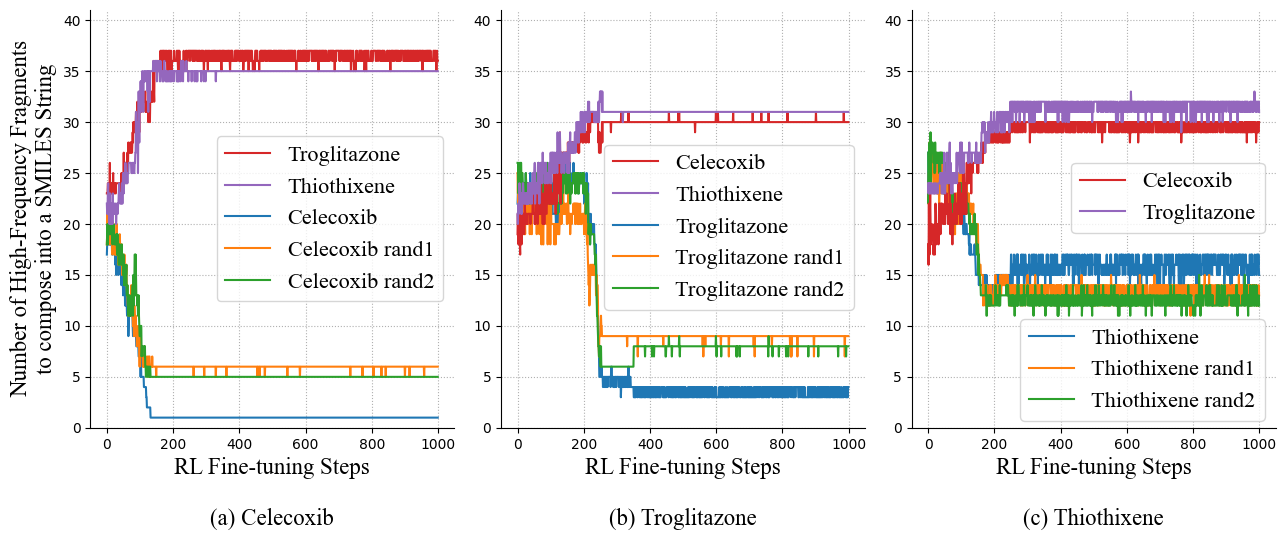

In [5]:
fig = plt.figure(figsize = (13, 5.5))

ax1 = fig.add_subplot(131)
line01, = plt.plot(tokens01["Step"], tokens01["Value"] - 2)
line02, = plt.plot(tokens02["Step"], tokens02["Value"] - 2)
line03, = plt.plot(tokens03["Step"], tokens03["Value"] - 2)
line0_1, = plt.plot(tokens0_1["Step"], tokens0_1["Value"] - 2)
line0_2, = plt.plot(tokens0_2["Step"], tokens0_2["Value"] - 2)
ax1.set_xlabel("RL Fine-tuning Steps\n\n(a) Celecoxib", fontsize=16.5, fontproperties="Times New Roman")
ax1.set_ylabel("Number of High-Frequency Fragments\nto compose into a SMILES String", fontsize=16.5, fontproperties="Times New Roman")
plt.yticks(list(np.linspace(0, 40, 9)))
ax1.set_ylim(0, 41)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend([line0_1, line0_2, line01, line02, line03], ["Troglitazone", "Thiothixene", "Celecoxib", "Celecoxib rand1", "Celecoxib rand2"], 
           prop={"family": "Times New Roman", "size": 16})
ax1.grid(ls=':')

ax2 = fig.add_subplot(132)
line11, = plt.plot(tokens11["Step"], tokens11["Value"] - 2)
line12, = plt.plot(tokens12["Step"], tokens12["Value"] - 2)
line13, = plt.plot(tokens13["Step"], tokens13["Value"] - 2)
line1_0, = plt.plot(tokens1_0["Step"], tokens1_0["Value"] - 2)
line1_2, = plt.plot(tokens1_2["Step"], tokens1_2["Value"] - 2)
ax2.set_xlabel("RL Fine-tuning Steps\n\n(b) Troglitazone", fontsize=16.5, fontproperties="Times New Roman")
plt.yticks(list(np.linspace(0, 40, 9)))
ax2.set_ylim(0, 41)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend([line1_0, line1_2, line11, line12, line13], ["Celecoxib", "Thiothixene", "Troglitazone", "Troglitazone rand1", "Troglitazone rand2"],
           prop={"family": "Times New Roman", "size": 16}, bbox_to_anchor=(1, 0.48), loc='center right')
ax2.grid(ls=':')

ax3 = fig.add_subplot(133)
line21, = plt.plot(tokens21["Step"], tokens21["Value"] - 2)
line22, = plt.plot(tokens22["Step"], tokens22["Value"] - 2)
line23, = plt.plot(tokens23["Step"], tokens23["Value"] - 2)
line2_0, = plt.plot(tokens2_0["Step"], tokens2_0["Value"] - 2)
line2_1, = plt.plot(tokens2_1["Step"], tokens2_1["Value"] - 2)
ax3.set_xlabel("RL Fine-tuning Steps\n\n(c) Thiothixene", fontsize=16.5, fontproperties="Times New Roman")
plt.yticks(list(np.linspace(0, 40, 9)))
ax3.set_ylim(0, 41)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
leg1 = ax3.legend([line21, line22, line23], ["Thiothixene", "Thiothixene rand1", "Thiothixene rand2"], bbox_to_anchor=(1, -0.01),
           prop={"family": "Times New Roman", "size": 16}, loc='lower right')
leg2 = ax3.legend([line2_0, line2_1], ["Celecoxib", "Troglitazone"], bbox_to_anchor=(1, 0.55),
           prop={"family": "Times New Roman", "size": 16}, loc='center right')
plt.gca().add_artist(leg1)
ax3.grid(ls=':')

plt.tight_layout()
plt.savefig("NumFrag.pdf")

In [6]:
codes = open(f"guacamol_0/tokens_step{i}.txt", 'r')